In [22]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from wordcloud import WordCloud,STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [23]:
Tweet= pd.read_csv("Tweets.csv")
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [24]:
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
name                            0.000000
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

# Lack of data in 2 of the columns urged me to delete those columns in the preprocessing step  (airline_sentiment_gold and negativereason_gold)


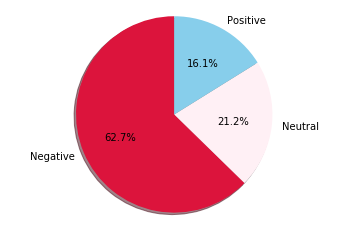

In [25]:
Mood_count=Tweet['airline_sentiment'].value_counts()

labels = 'Negative', 'Neutral', 'Positive'
sizes = [Mood_count[0], Mood_count[1], Mood_count[2]]
color_set = ('#DC143C', '#FFF0F5', '#87CEEB')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors = color_set, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Individual Airline Tweet Sentiments Ratio




  US Airways:



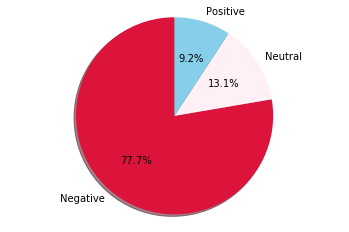

In [26]:
airlines_count=Tweet['airline'].value_counts()
def individual_senti(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    labels = 'Negative', 'Neutral', 'Positive'
    sizes = [count[0], count[1], count[2]]
    color_set = ('#DC143C', '#FFF0F5', '#87CEEB')
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, colors = color_set, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')
print ( '\n  US Airways:\n')    
individual_senti('US Airways')


  Southwest:



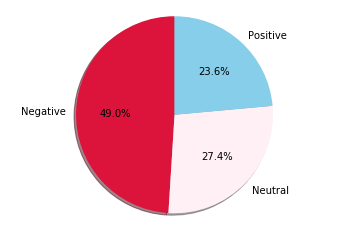

In [27]:
print ( '\n  Southwest:\n') 
individual_senti('Southwest')


  Delta:



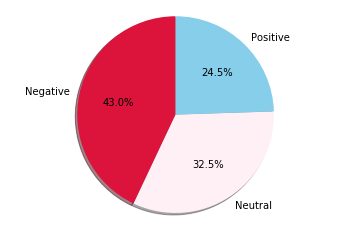

In [28]:
print ( '\n  Delta:\n') 
individual_senti('Delta')


  Virgin America:



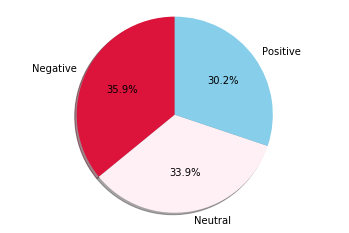

In [29]:
print ( '\n  Virgin America:\n') 
individual_senti('Virgin America')


  American:



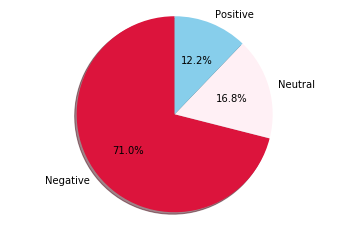

In [30]:
print ( '\n  American:\n') 
individual_senti('American')

In [31]:
NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))

def NR_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

  

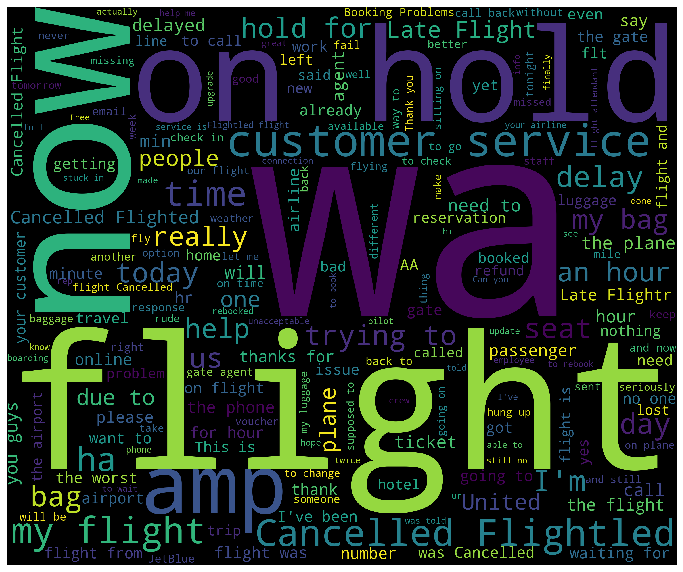

In [32]:
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [33]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))


def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words))

# Running nltk.download() required to download the appropriate packages

Vectorizing and acuqiring the test and train features.

In [34]:
#nltk.download() required to be ran to download the appropriate packages

Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)


train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)
    


from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)    

# Traning and automatic model selection using grid search

In order to find the best model, with the best hyperparameters, I implemented a grid search and pipelined the models. The following code will run over the training of the models as well as testing them on the test data and providing us information about each individual model's hyperparameters as well as highest accuracy that can be achieved.

It is crucial to note that this script can be used to compare any alternative model with their respective parameters; however, considering my device's computing power, I commented out the heaviest model (MLP) after the first time which provided around 76% accuracy. (Activation : Relu - Solver : Adam )

In [35]:
import time
start_time = time.time()

#MLP = MLPClassifier()
#MLP.fit(train_features, train['sentiment'])
#MLP_ACC = MLP.score(test_features, test['sentiment'])
#print("\nMLP: ", MLP_ACC)


SVM = SVC()
SVM.fit(train_features, train['sentiment']) 
SVM_ACC = SVM.score(test_features, test['sentiment'])


RFC = RandomForestClassifier()
RFC.fit(train_features, train['sentiment'])
RFC_ACC = RFC.score(test_features, test['sentiment'])



bagging = BaggingClassifier(SVC())
bagging.fit(train_features, train['sentiment'])
EN_ACC = bagging.score(test_features, test['sentiment'])



pipe_svm = Pipeline([('scl', StandardScaler(with_mean=False)),('clf', SVC())])

#pipe_MLP = Pipeline([('clf', MLPClassifier(max_iter=300))])

pipe_RFC = Pipeline([( 'clf' , RandomForestClassifier(min_samples_split= 2))])

# Set grid search params
C = [1, 3]
G = [0.01,0.1,1]


grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 'clf__C': C,'clf__degree':[3,4],'clf__gamma': G}]


#grid_params_MLP = [{'clf__activation':['identity','logistic','tanh','relu'],'clf__solver':['lbfgs','sgd','adam']}]
                                                                                    
grid_params_RFC = [{}]

# Construct grid searches
# Number of jobs indicate the number of logical processors that you are dedicating to the code, I personally deidcated
#6 out of 8 logical processors that I have in my disposal.
jobs = 6

gs_svm = GridSearchCV(estimator=pipe_svm,
    param_grid=grid_params_svm,
    scoring='accuracy',
    cv=4,
    n_jobs=jobs)



#gs_MLP = GridSearchCV(estimator=pipe_MLP,
   # param_grid=grid_params_MLP,
   # scoring='accuracy',
   # cv=4,
   # n_jobs=jobs)


gs_RFC = GridSearchCV(estimator=pipe_RFC,
    param_grid=grid_params_RFC,
    scoring='accuracy',
    cv=4,
    n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_svm, gs_RFC] #gs_MLP,

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Support Vector Machine', 1: 'Random Forest'} #, 2: 'Random Forest'

# Fit the grid search objects
if __name__ == "__main__":
    print('Performing model optimizations...')
    best_acc = 0.0
    best_clf = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        # Fit grid search
        gs.fit(train_features,train['sentiment'])
        # Best params
        print('Best params: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best training accuracy: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred = gs.predict(test_features)
        # Test data accuracy of model with best params
        print('Test set accuracy score for best params: %.3f ' % accuracy_score(test['sentiment'], y_pred))
        # Track best (highest test accuracy) model
        if accuracy_score(test['sentiment'], y_pred) > best_acc:
            best_acc = accuracy_score(test['sentiment'], y_pred)
            best_gs = gs
            best_clf = idx
            output = gs.predict(test_features)
            with open('predictions.txt', 'w') as outfile:
                for items in output:
                    outfile.write(str(items) + '\n')
                outfile.close()
    print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])
                                                                                    
                                                                                    
print("\n \n \n--> Total Running Time of the Script %s Seconds\n \n." % (time.time() - start_time)) 

Performing model optimizations...

Estimator: Support Vector Machine
Best params: {'clf__C': 1, 'clf__degree': 3, 'clf__gamma': 0.01, 'clf__kernel': 'linear'}
Best training accuracy: 0.722
Test set accuracy score for best params: 0.747 

Estimator: Random Forest
Best params: {}
Best training accuracy: 0.801
Test set accuracy score for best params: 0.814 

Classifier with best test set accuracy: Random Forest

 
 
--> Total Running Time of the Script 415.9371464252472 Seconds
 
.
